#Dataset loading

In [ ]:
"""
AI Spring 2022 Semester Project

Group Members:
1. 19K-1033 Syed Baqar Ali Zaidi
2. 19K-1041 Talha Altaf
3. 19K-1105 Talal Nasir

Project:
Plant Disease Detection using a Deep Neural Network
"""

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"k191041talhaaltaf","key":"29988c1468e0de9908699b9e02b8fdc7"}'}

In [ ]:
! mkdir ~/.kaggle 

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39           7113        937  0.9375           
datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education  Students Adaptability Level in Online Education    6KB  2022-04-16 04:46:28           4610        116  1.0              
datasets/muratkokludataset/rice-image-dataset                                  Rice Image Dataset                               219MB  2022-04-03 02:12:00           1349        764  0.875            


In [ ]:
! kaggle datasets download -d abdallahalidev/plantvillage-dataset

100% 2.04G/2.04G [00:38<00:00, 57.1MB/s]
100% 2.04G/2.04G [00:38<00:00, 57.4MB/s]


In [ ]:
! unzip plantvillage-dataset.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir "/content/drive/MyDrive/AI dataset"

mkdir: cannot create directory ‘/content/drive/MyDrive/AI dataset’: File exists


In [ ]:
! cp /content/plantvillage-dataset.zip "/content/drive/MyDrive/AI dataset"

cp: cannot stat '/content/plantvillage-dataset.zip': No such file or directory


In [ ]:
! unzip "/content/drive/MyDrive/AI dataset/plantvillage-dataset.zip" ###################################

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e345153-aed9-4879-a2cc-24f9dc5100e7___UF.GRC_YLCV_Lab 01798_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e37e8ad-3944-4e11-bc10-dd82616274d7___YLCV_NREC 2915_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e382244-fb3a-4caa-af71-05fff25f1c27___UF.GRC_YLCV_Lab 03397_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e3b9886-ce13-49d5-8f80-ccf4e5ddbeac___YLCV_GCREC 5479_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e615038-7a87-446a-a2cd-f76c5c75b6dd___YLCV_GCREC 5144_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e6938d9-1ab0-4728-993c-1069b66ce73b___UF.GRC_YLCV_Lab 02727_final_mas

# Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

EPOCHS = 100
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = '/content/plantvillage dataset'
width=256
height=256
depth=3

In [ ]:
#previous:
#train_datagen = ImageDataGenerator(zoom_range=0.5, shear_range=0.3, horizontal_flip = True, preprocessing_function=preprocess_input)

#better than previous: ~ 79% accuracy
# train_datagen = ImageDataGenerator(zoom_range=0.5, shear_range=0.3, horizontal_flip = True, rotation_range=40,width_shift_range=0.2,height_shift_range=0.2, preprocessing_function=preprocess_input)

#without using preprocessing_function argument: ~ 67.35659837722778 % accuracy on color dataset
# train_datagen = ImageDataGenerator(
#     rotation_range=25, width_shift_range=0.1,
#     height_shift_range=0.1, shear_range=0.2, 
#     zoom_range=0.2,horizontal_flip=True, 
#     fill_mode="nearest")

#using preprocessing_function argument: ~ 89.14833068847656 % accuracy on color dataset
train_datagen = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest", preprocessing_function=preprocess_input)


val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# SEGMENTED

In [ ]:
train = train_datagen.flow_from_directory(directory = "/content/plantvillage dataset/segmented", target_size = (256, 256), batch_size = 32)

val = val_datagen.flow_from_directory(directory = "/content/plantvillage dataset/segmented", target_size = (256, 256), batch_size = 32)

Found 54306 images belonging to 38 classes.
Found 54306 images belonging to 38 classes.


# COLOR

In [ ]:
train = train_datagen.flow_from_directory(directory = "/content/plantvillage dataset/color", target_size = (256, 256), batch_size = 32)

val = val_datagen.flow_from_directory(directory = "/content/plantvillage dataset/color", target_size = (256, 256), batch_size = 32)

Found 54305 images belonging to 38 classes.
Found 54305 images belonging to 38 classes.


# GRAY SCALE

In [ ]:
train = train_datagen.flow_from_directory(directory = "/content/plantvillage dataset/grayscale", target_size = (256, 256), batch_size = 32)

val = val_datagen.flow_from_directory(directory = "/content/plantvillage dataset/grayscale", target_size = (256, 256), batch_size = 32)

#FULL DATASET

In [ ]:
#DOESN'T WORK
train = train_datagen.flow_from_directory(follow_links=True, directory = "/content/plantvillage dataset/", target_size = (256, 256), batch_size = 32)

val = val_datagen.flow_from_directory(follow_links=True, directory = "/content/plantvillage dataset/", target_size = (256, 256), batch_size = 32)

Found 162916 images belonging to 3 classes.
Found 162916 images belonging to 3 classes.


In [ ]:
t_img, label = train.next()

In [ ]:
#t_img.shape

In [ ]:
def plotImage(img_arr, label):

    for im, l in zip(img_arr, label):
      plt.figure(figsize=(5,5))
      plt.imshow(im)
      plt.show()

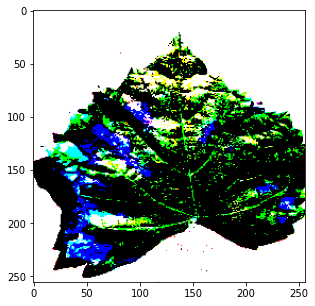

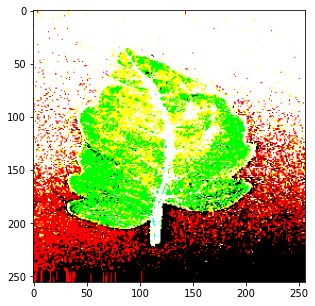

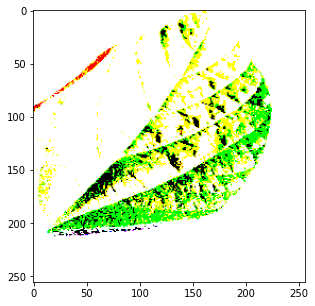

In [ ]:
plotImage(t_img[:3], label[:3])

In [ ]:
from keras.layers  import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model = VGG19(input_shape=(256,256,3), include_top=False)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
#base_model.summary()

In [ ]:
X = Flatten()(base_model.output)

X = Dense(units = 38, activation = 'softmax')(X)

# X = Dense(units = 3, activation = 'softmax')(X)

#Creating our model
model = Model(base_model.input, X)

# model.add(Dense(3, activation = 'softmax'))

In [ ]:
#model.summary()

In [ ]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

#Early Stopping and Model Check point


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping
es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 3, verbose = 1)

#model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor = 'val_accuracy', min_delta = 0.01, patience = 3, verbose = 1, save_best_only = True)

cb = [es, mc]

In [ ]:
his = model.fit_generator(train, steps_per_epoch = len(train) // BS, epochs = EPOCHS, verbose = 1, callbacks = cb, validation_data = val, validation_steps = 16)

###IMPROVEMENT:crossvalidateafterreducing training image

# his = model.fit_generator(
#     train_datagen.flow(train, batch_size=BS),
#     validation_data=(val),
#     steps_per_epoch=len(train) // BS,
#     epochs=EPOCHS, verbose=1
#     )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/100
53/53 [==============================] - ETA: 0s - loss: 13.7406 - accuracy: 0.5112
Epoch 1: val_accuracy improved from -inf to 0.79492, saving model to best_model.h5
53/53 [==============================] - 33s 610ms/step - loss: 13.7406 - accuracy: 0.5112 - val_loss: 5.5825 - val_accuracy: 0.7949
Epoch 2/100
53/53 [==============================] - ETA: 0s - loss: 7.0202 - accuracy: 0.7164
Epoch 2: val_accuracy improved from 0.79492 to 0.83789, saving model to best_model.h5
53/53 [==============================] - 31s 589ms/step - loss: 7.0202 - accuracy: 0.7164 - val_loss: 4.2218 - val_accuracy: 0.8379
Epoch 3/100
53/53 [==============================] - ETA: 0s - loss: 6.0383 - accuracy: 0.7677
Epoch 3: val_accuracy did not improve from 0.83789
53/53 [==============================] - 31s 587ms/step - loss: 6.0383 - accuracy: 0.7677 - val_loss: 4.4642 - val_accuracy: 0.8301
Epoch 4/100
53/53 [==============================] - ETA: 0s - loss: 6.1081 - accuracy: 0.7883
Ep

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

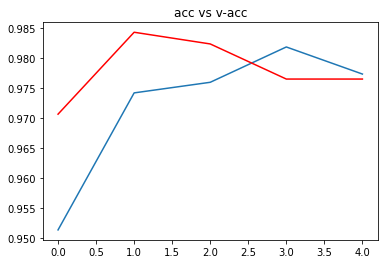

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c ="red")
plt.title("acc vs v-acc")
plt.show()

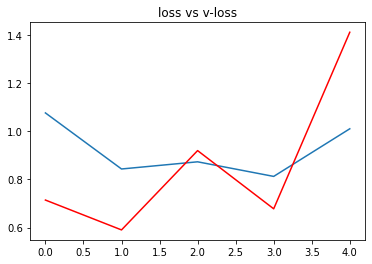

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c ="red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
#load best model

from keras.models import load_model

model = load_model("/content/best_model.h5")

In [ ]:
acc = model.evaluate(val)[1]

print(f"Accuracy of model = {acc*100} %")

1698/1698 [==============================] - 387s 228ms/step - loss: 4.2079 - accuracy: 0.8829
Accuracy of model = 88.28837275505066 %


In [ ]:
ref = dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))

In [ ]:
def prediction(path):

  img = load_img(path, target_size = (256,256))

  i = img_to_array(img)

  im = preprocess_input(i)

  #print(im)

  img = np.expand_dims(im, axis = 0)

  #print(img.shape)

  pred = np.argmax(model.predict(img))

  print(f"Image belongs to class: {ref[pred]}")

In [ ]:
# path = "/content/plantvillage dataset/color/Tomato___healthy/003944fc-3b99-4a0f-9ed4-0e07352fd8b3___RS_HL 9844.JPG"

# path = "/content/plantvillage dataset/color/Tomato___Leaf_Mold/022a4dfb-84cc-45cb-81c5-a620817e31cb___Crnl_L.Mold 6926.JPG"

# path = "/content/plantvillage dataset/color/Tomato___Spider_mites Two-spotted_spider_mite/01720a27-7595-496b-bf53-dbe5c8c1e2c3___Com.G_SpM_FL 8476.JPG"

path = "/content/plantvillage dataset/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/0036c89d-7743-4895-9fcf-b8d2c1fc8455___YLCV_NREC 0313.JPG"

# path = "/content/plantvillage dataset/color/Strawberry___healthy/00532378-bfb2-4d3b-8b19-903ecc085624___RS_HL 2021.JPG"

prediction(path)

Image belongs to class: Tomato___Tomato_Yellow_Leaf_Curl_Virus
